## <span style="color:red;"> Detección de interbloqueos usando grafos </span>

A continuación se presenta una clase que permite crear grafos de recursos y procesos y analizar si existe un círculo vicioso que indicaría que existe un interbloqueo.

La única propiedad de esta clase es el grafo y se dispone de tres métodos para operar con este problema, los dos primeros carecen de importancia para el aprendizaje pero son necesarios para crear los grafos y representarlos. El primero es el método *requests* que recibe como parámetros un número indeterminado de duplas que tienen dos valores, el primero indica número del proceso que solicita el recurso y el segundo el número del recurso solicitado. El método *draw* permite dibujar el grafo.

El tercer método y que sí es importante para el aprendizaje es el que sigue el procedimiento descrito en la teoría para determinar si existe algún círculo vicioso. Este consiste en recorrer el grafo partiendo cada vez de un nodo (recurso o proceso) hasta haber elegido todos los nodos iniciales posibles. Si en el algún recorrido del grafo volvemos a encontrarnos con algún nodo que ya estuviese en el recorrido quiere decir que hay un círculo vicioso y por tanto un interbloqueo.

Como siempre el código no está comentado con el fin de que hagáis el esfuerzo de entenderlo que es lo que realmente os proporcionará conocimiento. Para ello basta con que os centréis en entender cómo funciona el método *interlock* y el método interno *_next_node*.

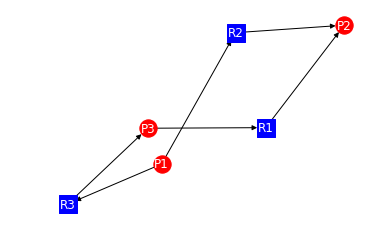

____________________________
['P2']
____________________________
['R2']
['R2', 'P2']
____________________________
['P3']
['P3', 'R1']
['P3', 'R1', 'P2']
____________________________
['R3']
['R3', 'P3']
['R3', 'P3', 'R1']
['R3', 'P3', 'R1', 'P2']
____________________________
['P1']
['P1', 'R3']
['P1', 'R3', 'P3']
['P1', 'R3', 'P3', 'R1']
['P1', 'R3', 'P3', 'R1', 'P2']
['P1', 'R2']
['P1', 'R2', 'P2']
____________________________
['R1']
['R1', 'P2']
____________________________

Sin interbloqueo




In [230]:
import networkx as nx
import matplotlib.pyplot as plt

class interlock:
    def __init__(self):
        self.gr = nx.DiGraph()
        
    def requests(self, *requests):
        for req in requests:
            proc_name = "P"+str(req[0])
            resource_name = "R"+str(req[1])
            
            if proc_name not in self.gr and resource_name not in self.gr:
                self.gr.add_node(proc_name,nodetype = "P")
                self.gr.add_node(resource_name, nodetype = "R")
                self.gr.add_edge(resource_name,proc_name)  
            elif proc_name not in self.gr and resource_name in self.gr:
                self.gr.add_node(proc_name,nodetype = "P")
                self.gr.add_edge(proc_name, resource_name)
            elif proc_name in self.gr and resource_name not in self.gr:
                self.gr.add_node(resource_name, nodetype = "R")
                self.gr.add_edge(resource_name,proc_name)
            elif resource_name in self.gr[proc_name] or proc_name in self.gr[resource_name]:
                print("El mismo proceso no puede solicitar dos veces el mismo recurso (proceso:"+proc_name+", recurso:"+resource_name+")")
            else:
                self.gr.add_edge(proc_name, resource_name)
        
    def draw(self):
        proc_list = []
        resources_list = []
        for node in self.gr:
            if node[0] == "R":
                resources_list.append(node)
            elif node[0] == "P":
                proc_list.append(node)
        plt.axis('off')
        pos=nx.spring_layout(self.gr,seed=23970)
        nx.draw_networkx_nodes(self.gr, pos=pos, nodelist=resources_list, node_shape="s", node_color="b")
        nx.draw_networkx_nodes(self.gr, pos=pos, nodelist=proc_list, node_shape="o", node_color="r")
        nx.draw_networkx_labels(self.gr, pos=pos, font_color="w")
        nx.draw_networkx_edges(self.gr,pos=pos)
        plt.show()
        
        
    def _next_node(self, node_list):
        if not self.gr[node_list[-1]]: 
            print(node_list)
            return "Sin interbloqueo", node_list       
        
        print(node_list)
        for nextnode in self.gr[node_list[-1]]:
            if nextnode in node_list:
                node_list.append(nextnode)
                return "Interbloqueo", node_list
            node_list_aux = node_list[:]
            node_list_aux.append(nextnode)
            state, node_list_aux = self._next_node(node_list_aux)  
            if state is "Interbloqueo": 
                return "Interbloqueo", node_list_aux
        return "Sin interbloqueo", node_list
            
    def interlock(self):
        for node in self.gr:
            print("____________________________")
            node_list =[node]
            state, node_list = self._next_node(node_list)
            if state is "Interbloqueo":
                print("____________________________")
                print("\nInterbloqueo: ", node_list)
                return
        print("____________________________")
        print("\nSin interbloqueo\n\n")
        return

    
# Ejemplo de uso
il = interlock()
il.requests((2,2), (3,3),(1,3), (2,1),(1,2),(3,1))
il.draw()
il.interlock()